# 과제 1
basketball_sample.csv는 농구선수의 데이터를 모아놓은 자료입니다.\
각 변수는 다음과 같습니다.\

- g: 총 출전 경기 수
- gs: 선발 출전 경기 수
- mp: 게임당 평균 플레이 시간
- fgperc: 평균 슈팅 정확도 퍼센테지
- reb: 경기당 평균 리바운드 갯수
- ast: 경기당 평균 도움 갯수
- stl: 경기당 평균 가로채기 갯수
- blk: 경기당 평균 블로킹 갯수
- tov: 경기당 평균 실책 갯수
- ptsg: 경기당 평균 득점
- ws: 승리기여도
- sal: 평균연봉(백만달러)

이 때, 모형 1은
\begin{equation}
ws = a + b_1g + b_2mp + b_3ptsg
\end{equation}

모형 2는 
\begin{equation}
sal = a + b_1g + b_2mp + b_3fgperc + b_4reb + b_5ast + b_6stl + b_7blk + b_8tov + b_9ptsg
\end{equation}
\
\
라 할 때 두 회귀모형을 각각 OLS방법으로 도출하시오.




In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('reg_data/basketball_sample.csv')
print(df)

      season team              name  age     g    gs           mp  fgperc  \
0       2005  LAL       Kobe Bryant   27  80.0  80.0    41.000000   0.450   
1       2005  PHI     Allen Iverson   30  72.0  72.0    43.099998   0.447   
2       2002  ORL     Tracy McGrady   23  75.0  74.0    39.400002   0.457   
3       2013  OKC      Kevin Durant   25  81.0  81.0    38.500000   0.503   
4       2006  LAL       Kobe Bryant   28  77.0  77.0    40.799999   0.463   
...      ...  ...               ...  ...   ...   ...          ...     ...   
7408    2012  MIN     Greg Stiemsma   27   NaN   NaN  1209.000000     NaN   
7409    1998  BOS        Ron Mercer   22   NaN   NaN  1551.000000     NaN   
7410    2012  MIN  Andrei Kirilenko   31   NaN   NaN  2034.000000     NaN   
7411    2001  NYK      Mark Jackson   36   NaN   NaN  2367.000000     NaN   
7412    2012  MIN      Luke Ridnour   31   NaN   NaN  2474.000000     NaN   

      reb  ast  stl  blk  tov       ptsg         ws        sal  
0     5.3 

In [3]:
# df의 각각의 컬럼에 대한 데이터 타입을 확인
print(df.dtypes)

season      int64
team       object
name       object
age         int64
g         float64
gs        float64
mp        float64
fgperc    float64
reb       float64
ast       float64
stl       float64
blk       float64
tov       float64
ptsg      float64
ws        float64
sal       float64
dtype: object


In [4]:
# df의 데이터에 널값이 있는지 확인하고, 널값이 있다면 해당 행을 삭제
print(df.isnull().sum())

season     0
team       0
name       0
age        0
g         22
gs        22
mp         0
fgperc    22
reb       22
ast       22
stl       22
blk       22
tov       22
ptsg      22
ws         4
sal        0
dtype: int64


In [6]:
# 데이터 널값 제거
df = df.dropna()
print(df)

      season team                name  age     g    gs         mp  fgperc  \
0       2005  LAL         Kobe Bryant   27  80.0  80.0  41.000000   0.450   
1       2005  PHI       Allen Iverson   30  72.0  72.0  43.099998   0.447   
2       2002  ORL       Tracy McGrady   23  75.0  74.0  39.400002   0.457   
3       2013  OKC        Kevin Durant   25  81.0  81.0  38.500000   0.503   
4       2006  LAL         Kobe Bryant   28  77.0  77.0  40.799999   0.463   
...      ...  ...                 ...  ...   ...   ...        ...     ...   
7386    2012  CHA       DeSagana Diop   31  22.0   1.0  10.300000   0.296   
7387    1998  BKN  William Cunningham   24  15.0   6.0  10.700000   0.167   
7388    2000  TOR       Muggsy Bogues   36   3.0   0.0  11.300000   0.000   
7389    2015  NOP       Nate Robinson   31   2.0   1.0  11.500000   0.000   
7390    2004  NYK    Shandon Anderson   31   1.0   0.0  20.000000   0.000   

      reb  ast  stl  blk  tov       ptsg         ws        sal  
0     5.3 

In [7]:
# g: 총 출전 경기 수, gs: 선발 출전 경기 수, mp: 게임당 평균 플레이 시간, fgperc: 평균 슈팅 정확도 퍼센테지, reb: 경기당 평균 리바운드 갯수, 
# ast: 경기당 평균 도움 갯수, stl: 경기당 평균 가로채기 갯수, blk: 경기당 평균 블로킹 갯수, tov: 경기당 평균 실책 갯수, ptsg: 경기당 평균 득점, 
# ws: 승리기여도, sal: 평균연봉(백만달러)
# 회귀모형1:  ws = a + b_1g + b_2mp + b_3ptsg
# 회귀모형2:  sal = a + b_1g + b_2mp + b_3fgperc + b_4reb + b_5ast + b_6stl + b_7blk + b_8tov + b_9ptsg
# 회귀모형1의 최소제곱법(OLS)방법으로 도출, 회귀모형2의 최소제곱법(OLS)방법으로 도출
# 회귀모형1 회귀분석을 위해 피쳐들의 리스트를 따로 추출하여 Matrix로 구성합니다. 종속변수는 단일벡터이기에 그냥 리스트로 추출합니다.
columns = ['g', 'mp', 'ptsg']
R1_X = df[columns].to_numpy()
R1_y = df['ws'].to_numpy()

# 회귀모형2 회귀분석을 위해 피쳐들의 리스트를 따로 추출하여 Matrix로 구성합니다. 종속변수는 단일벡터이기에 그냥 리스트로 추출합니다.
columns = ['g', 'mp', 'fgperc', 'reb', 'ast', 'stl', 'blk', 'tov', 'ptsg']
R2_X = df[columns].to_numpy()
R2_y = df['sal'].to_numpy()

In [8]:
# 데이터를 트레이닝셋과 테스트셋으로 나누는데 sklearn의 train_test_split을 사용합니다.
from sklearn.model_selection import train_test_split
R1_X_train, R1_X_test, R1_y_train, R1_y_test = train_test_split(R1_X, R1_y, test_size=0.2, random_state=42)
R2_X_train, R2_X_test, R2_y_train, R2_y_test = train_test_split(R2_X, R2_y, test_size=0.2, random_state=42)

In [9]:
# LinearRegression 모델을 사용하여 회귀분석을 합니다.
from sklearn.linear_model import LinearRegression
R1_model = LinearRegression().fit(R1_X_train, R1_y_train)
R2_model = LinearRegression().fit(R2_X_train, R2_y_train)


In [10]:
# 회귀모형1의 .coef_옵션을 통해 계수추정값이 얼마인지 확인합니다.
print(R1_model.coef_)

[0.05325748 0.03907562 0.27605618]


In [11]:
# 회귀모형2의 .coef_옵션을 통해 계수추정값이 얼마인지 확인합니다.
print(R2_model.coef_)

[-0.02103562 -0.02080877 -1.60191885  0.4952436   0.68070378 -1.33861069
  0.67884647 -0.95596933  0.39956084]


In [12]:
# 회귀모형1의 y값을 예측합니다.
R1_y_pred = R1_model.predict(R1_X_test)
# 회귀모형2의 y값을 예측합니다.
R2_y_pred = R2_model.predict(R2_X_test)

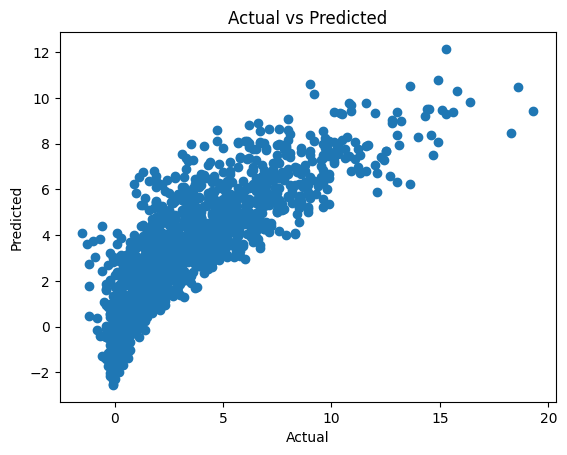

In [13]:
# 회귀모형1의 실제 테스트 값과 예측값 사이의 관계를 알아보겠습니다.
import matplotlib.pyplot as plt
plt.scatter(R1_y_test, R1_y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

In [15]:
# 모형의 적합도 및 성능을 알아보기 위해 R2, Adj-R2, MSE, RMSE, MAE, MAPE를 구합니다.
# R2와 Adj-R2은 0에서 1사이의 값을 갖는데, 1에 가까울수록 설명력이 높습니다.\
# MSE, RMSE, MAE, MAPE는 낮을수록 좋습니다.
# 회귀모형1의 R2, Adj-R2, MSE, RMSE, MAE, MAPE를 구합니다.
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_log_error
from math import sqrt

R1_mse = mean_squared_error(R1_y_test, R1_y_pred)
R1_rmse = sqrt(R1_mse)
R1_mae = mean_absolute_error(R1_y_test, R1_y_pred)
R1_r2 = r2_score(R1_y_test, R1_y_pred)
R1_adj_r2 = 1 - (1-R1_r2)*(len(R1_y_test)-1)/(len(R1_y_test)-R1_X_test.shape[1]-1)
R1_mape = mean_absolute_percentage_error(R1_y_test, R1_y_pred)

R2_mse = mean_squared_error(R2_y_test, R2_y_pred)
R2_rmse = sqrt(R2_mse)
R2_mae = mean_absolute_error(R2_y_test, R2_y_pred)
R2_r2 = r2_score(R2_y_test, R2_y_pred)
R2_adj_r2 = 1 - (1-R2_r2)*(len(R2_y_test)-1)/(len(R2_y_test)-R2_X_test.shape[1]-1)
R2_mape = mean_absolute_percentage_error(R2_y_test, R2_y_pred)

print("R1_r2: ", R1_r2)
print("R1_adj_r2: ", R1_adj_r2)
print("R1_mse: ", R1_mse)
print("R1_rmse: ", R1_rmse)
print("R1_mae: ", R1_mae)
print("R1_mape: ", R1_mape)

print("R2_r2: ", R2_r2)
print("R2_adj_r2: ", R2_adj_r2)
print("R2_mse: ", R2_mse)
print("R2_rmse: ", R2_rmse)
print("R2_mae: ", R2_mae)
print("R2_mape: ", R2_mape)



R1_r2:  0.6842923166469245
R1_adj_r2:  0.6836497636957309
R1_mse:  3.306236905253909
R1_rmse:  1.81830605379125
R1_mae:  1.3500360247541447
R1_mape:  115881026746256.72
R2_r2:  0.3770840241309733
R2_adj_r2:  0.37326505697646295
R2_mse:  12.451244352455351
R2_rmse:  3.528632079497004
R2_mae:  2.5511065722776483
R2_mape:  2.2481940398387823


#### 모형의 적합도 및 성능을 알아보기 위해 R2, Adj-R2, MSE, RMSE, MAE, MAPE를 확인해본바에 따르면,

- 회귀모형1의 R2, Adj-R2가 0.68로 높은 설명력을 보이고, MSE, RMSE, MAE, MAPE가 낮은 수치를 보이고 있습니다.
- 반면 회귀모형2는 R2, Adj-R2가 0.37로 낮은 설명력을 보이고, MSE, RMSE, MAE, MAPE가 높은 수치를 보이고 있습니다.

# 과제 2

같은 데이터를 75%는 트레이닝 데이터, 25%는 테스트 데이터로 구분하여 머신러닝 후 각각 모형을 평가하시오.

In [16]:
# 같은 데이터를 75%는 트레이닝 데이터, 25%는 테스트 데이터로 구분하여 머신러닝 후 각각 모형을 평가합니다.
# 데이터를 트레이닝셋과 테스트셋으로 나누는데 sklearn의 train_test_split을 사용합니다.
from sklearn.model_selection import train_test_split
RR1_X_train, RR1_X_test, RR1_y_train, RR1_y_test = train_test_split(R1_X, R1_y, test_size=0.25, random_state=42)
RR2_X_train, RR2_X_test, RR2_y_train, RR2_y_test = train_test_split(R2_X, R2_y, test_size=0.25, random_state=42)

In [17]:
# LinearRegression 모델을 사용하여 회귀분석을 합니다.
from sklearn.linear_model import LinearRegression
RR1_model = LinearRegression().fit(RR1_X_train, RR1_y_train)
RR2_model = LinearRegression().fit(RR2_X_train, RR2_y_train)

In [18]:
# 회귀모형1의 y값을 예측합니다.
RR1_y_pred = RR1_model.predict(RR1_X_test)
# 회귀모형2의 y값을 예측합니다.
RR2_y_pred = RR2_model.predict(RR2_X_test)

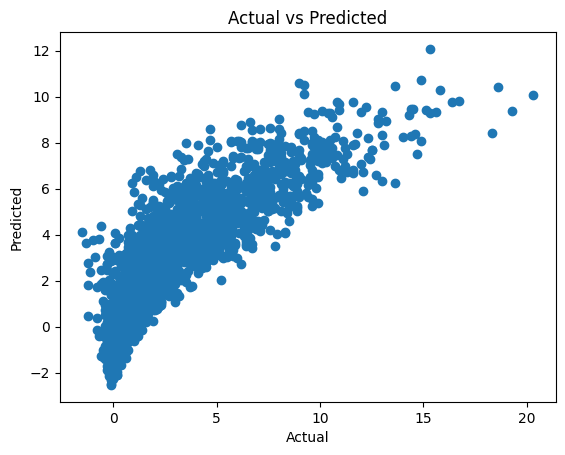

In [19]:
# 회귀모형1의 실제 테스트 값과 예측값 사이의 관계를 알아보겠습니다.
import matplotlib.pyplot as plt
plt.scatter(RR1_y_test, RR1_y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

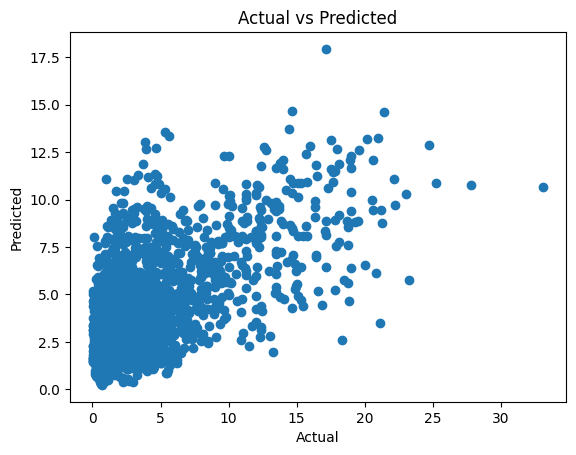

In [20]:
# 회귀모형2의 실제 테스트 값과 예측값 사이의 관계를 알아보겠습니다.
import matplotlib.pyplot as plt
plt.scatter(RR2_y_test, RR2_y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

In [21]:
# 회귀모형1의 적합도 및 성능을 알아보기 위해 R2, Adj-R2, MSE, RMSE, MAE, MAPE를 구합니다.
# R2와 Adj-R2은 0에서 1사이의 값을 갖는데, 1에 가까울수록 설명력이 높습니다.\
# MSE, RMSE, MAE, MAPE는 낮을수록 좋습니다.
# 회귀모형1의 R2, Adj-R2, MSE, RMSE, MAE, MAPE를 구합니다.
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_log_error
from math import sqrt

RR1_mse = mean_squared_error(RR1_y_test, RR1_y_pred)
RR1_rmse = sqrt(RR1_mse)
RR1_mae = mean_absolute_error(RR1_y_test, RR1_y_pred)
RR1_r2 = r2_score(RR1_y_test, RR1_y_pred)
RR1_adj_r2 = 1 - (1-RR1_r2)*(len(RR1_y_test)-1)/(len(RR1_y_test)-RR1_X_test.shape[1]-1)
RR1_mape = mean_absolute_percentage_error(RR1_y_test, RR1_y_pred)

RR2_mse = mean_squared_error(RR2_y_test, RR2_y_pred)
RR2_rmse = sqrt(RR2_mse)
RR2_mae = mean_absolute_error(RR2_y_test, RR2_y_pred)
RR2_r2 = r2_score(RR2_y_test, RR2_y_pred)
RR2_adj_r2 = 1 - (1-RR2_r2)*(len(RR2_y_test)-1)/(len(RR2_y_test)-RR2_X_test.shape[1]-1)
RR2_mape = mean_absolute_percentage_error(RR2_y_test, RR2_y_pred)

print("RR1_r2: ", RR1_r2)
print("RR1_adj_r2: ", RR1_adj_r2)
print("RR1_mse: ", RR1_mse)
print("RR1_rmse: ", RR1_rmse)
print("RR1_mae: ", RR1_mae)
print("RR1_mape: ", RR1_mape)

print("RR2_r2: ", RR2_r2)
print("RR2_adj_r2: ", RR2_adj_r2)
print("RR2_mse: ", RR2_mse)
print("RR2_rmse: ", RR2_rmse)
print("RR2_mae: ", RR2_mae)
print("RR2_mape: ", RR2_mape)


RR1_r2:  0.6900612252455525
RR1_adj_r2:  0.6895567128612533
RR1_mse:  3.215000776441884
RR1_rmse:  1.7930423242193376
RR1_mae:  1.330871994604965
RR1_mape:  109881732802052.0
RR2_r2:  0.3779022051583826
RR2_adj_r2:  0.3748543662070628
RR2_mse:  12.562235110342957
RR2_rmse:  3.544324351740816
RR2_mae:  2.567991844480324
RR2_mape:  2.3563603019635364


In [22]:
# 회귀모형1과 회귀모형2의 모형의 적합도 및 성능을 알아보기 위해 R2, Adj-R2, MSE, RMSE, MAE, MAPE를 확인 결과,
# 회귀모형1의 R2: 0.69, Adj-R2: 0.68, MSE: 3.21, RMSE: 1.79, MAE: 1.33, MAPE: 109881732802052
# 회귀모형2의 R2: 0.38, Adj-R2: 0.37, MSE: 12.56, RMSE: 3.54, MAE: 2.57, MAPE: 2.36
# 회귀모형1의 R2, Adj-R2, MSE, RMSE, MAE, MAPE가 더 좋은 성능을 보이고 있습니다.


# 과제 3

bikeshare.csv는 Kaggle에서 다운로드 받은 데이터로 자전거 대여 서비스에 관한 데이터이다.(https://www.kaggle.com/c/bike-sharing-demand/data)
데이터의 설명은 다음과 같다.

- datetime: 시간대(시간단위)
- season: 계절(1봄, 2여름, 3가을, 4겨울)
- holiday: 1은 공휴일
- workingday: 1은 주말도 공휴일도 아닌날
- weather: 1맑음 2안개 3가벼운비 4폭우
- temp: 기온(섭씨)
- atemp: 체감온도
- humidity: 습도
- windspeed: 풍속
- casual: 비회원으로 빌려간 유저의 수
- registered: 회원으로 빌려간 유저의 수
- count: 총 이용자 수

이를 활용하여 모형을 세우고 회귀분석 방법을 활용하여 데이터 분석을 해보자.

In [23]:
# bikeshare.csv는 자전거 대여소의 데이터입니다. 이 데이터를 이용하여 회귀분석을 진행합니다.
# 데이터를 불러옵니다.
df = pd.read_csv('reg_data/bikeshare.csv')
print(df)

                  datetime  season  holiday  workingday  weather   temp  \
0      2011-01-01 00:00:00       1        0           0        1   9.84   
1      2011-01-01 01:00:00       1        0           0        1   9.02   
2      2011-01-01 02:00:00       1        0           0        1   9.02   
3      2011-01-01 03:00:00       1        0           0        1   9.84   
4      2011-01-01 04:00:00       1        0           0        1   9.84   
...                    ...     ...      ...         ...      ...    ...   
10881  2012-12-19 19:00:00       4        0           1        1  15.58   
10882  2012-12-19 20:00:00       4        0           1        1  14.76   
10883  2012-12-19 21:00:00       4        0           1        1  13.94   
10884  2012-12-19 22:00:00       4        0           1        1  13.94   
10885  2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  registered  count  
0      14.395        81     0.0000 

In [24]:
# df의 각각의 컬럼에 대한 데이터 타입을 확인
print(df.dtypes)

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object


In [25]:
# df의 데이터에 널값이 있는지 확인하고, 널값이 있다면 해당 행을 삭제
print(df.isnull().sum())

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64


In [27]:
# 널값이 없으므로 널값 제거는 생략하고, 회귀모형을 만들기 위해 상관계수를 확인하는데, datetime의 컬럼이 오브젝트 타입이어서 데이트타입 타입으로 변환.
df['datetime'] = pd.to_datetime(df['datetime'])
# df['datetime']을 연도, 월, 일, 요일, 시간 정보로 파생 변수를 생성.
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour
df['weekday'] = df['datetime'].dt.weekday 


In [29]:
# 여기서 season과 weather는 범주형 변수이므로 원-핫 인코딩을 통해 처리됩니다.
df = pd.get_dummies(df, columns=['season', 'weather'])
print(df)

                 datetime  holiday  workingday   temp   atemp  humidity  \
0     2011-01-01 00:00:00        0           0   9.84  14.395        81   
1     2011-01-01 01:00:00        0           0   9.02  13.635        80   
2     2011-01-01 02:00:00        0           0   9.02  13.635        80   
3     2011-01-01 03:00:00        0           0   9.84  14.395        75   
4     2011-01-01 04:00:00        0           0   9.84  14.395        75   
...                   ...      ...         ...    ...     ...       ...   
10881 2012-12-19 19:00:00        0           1  15.58  19.695        50   
10882 2012-12-19 20:00:00        0           1  14.76  17.425        57   
10883 2012-12-19 21:00:00        0           1  13.94  15.910        61   
10884 2012-12-19 22:00:00        0           1  13.94  17.425        61   
10885 2012-12-19 23:00:00        0           1  13.12  16.665        66   

       windspeed  casual  registered  count  ...  hour  weekday  season_1  \
0         0.0000      

In [39]:
# 데이터의 통계적 정보를 확인합니다.
print(df.describe())

                            datetime       holiday    workingday         temp  \
count                          10886  10886.000000  10886.000000  10886.00000   
mean   2011-12-27 05:56:22.399411968      0.028569      0.680875     20.23086   
min              2011-01-01 00:00:00      0.000000      0.000000      0.82000   
25%              2011-07-02 07:15:00      0.000000      0.000000     13.94000   
50%              2012-01-01 20:30:00      0.000000      1.000000     20.50000   
75%              2012-07-01 12:45:00      0.000000      1.000000     26.24000   
max              2012-12-19 23:00:00      1.000000      1.000000     41.00000   
std                              NaN      0.166599      0.466159      7.79159   

              atemp      humidity     windspeed        casual    registered  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      23.655084     61.886460     12.799395     36.021955    155.552177   
min        0.760000      0.000000

In [30]:
# 회귀모형을 만들기 위해 상관계수를 확인합니다.
print(df.corr())

            datetime   holiday  workingday      temp     atemp  humidity  \
datetime    1.000000  0.010988   -0.003658  0.180986  0.181823  0.032856   
holiday     0.010988  1.000000   -0.250491  0.000295 -0.005215  0.001929   
workingday -0.003658 -0.250491    1.000000  0.029966  0.024660 -0.010880   
temp        0.180986  0.000295    0.029966  1.000000  0.984948 -0.064949   
atemp       0.181823 -0.005215    0.024660  0.984948  1.000000 -0.043536   
humidity    0.032856  0.001929   -0.010880 -0.064949 -0.043536  1.000000   
windspeed  -0.086888  0.008409    0.013373 -0.017852 -0.057473 -0.318607   
casual      0.172728  0.043799   -0.319111  0.467097  0.462067 -0.348187   
registered  0.314879 -0.020956    0.119460  0.318571  0.314635 -0.265458   
count       0.310187 -0.005393    0.011594  0.394454  0.389784 -0.317371   
year        0.866570  0.012021   -0.002482  0.061226  0.058540 -0.078606   
month       0.494087  0.001731   -0.003394  0.257589  0.264173  0.204537   
day         

### 1. 선택된 변수들:

- hour는 하루 중 시간과 count의 상관계수가 높으므로, 시간대별 대여 수 변화를 포착하는 데 중요한 변수입니다.
- temp는 기온이 count에 미치는 영향을 나타내며, atemp와 매우 높은 상관관계가 있기 때문에 둘 중 하나만 모델에 포함하는 것이 좋습니다.
- humidity는 count와 음의 상관관계를 보여줍니다. 습도가 높을수록 자전거 이용률이 낮을 수 있음을 의미합니다.
- season_1, season_2, season_3, season_4, weather_1, weather_2, weather_3, weather_4는 계절과 날씨 조건이 원-핫 인코딩으로 처리되었으며, 각각의 카테고리는 count와 다른 상관관계를 가지고 있습니다.

### 2. 회귀 모델의 구성:

- **종속 변수:** count - 총 자전거 대여 수
- **독립 변수:** 모델에 포함할 수 있는 주요 변수는 hour, temp (또는 atemp), humidity, season_1, season_2, season_3, season_4, weather_1, weather_2, weather_3 입니다. 이 변수들은 각각 시간, 온도, 습도, 계절, 날씨와 같은 요소가 자전거 대여 수에 미치는 영향을 포착합니다.
- holiday와 workingday는 모델에 포함할 수 있지만, 이 둘은 서로 반대 개념이므로 함께 포함시키는 것은 적절하지 않을 수 있습니다.

### 3. 모델의 해석:

- 'hour'와 temp의 양의 상관관계는 자전거 대여 수가 하루 중 특정 시간에 높으며, 기온이 온화할 때 더 많이 대여됨을 나타냅니다.
- humidity의 음의 상관관계는 습도가 높을 때 자전거 대여 수가 감소할 수 있음을 의미합니다.
- 계절과 날씨 관련 더미 변수들은 특정 계절이나 날씨 상태에서 자전거 대여 수의 변화를 포착할 수 있습니다.

In [32]:
# 회귀모형을 만들기 위해 종속변수와 독립변수를 설정합니다.
# 종속 변수: count - 총 자전거 대여 수
# 독립 변수: 모델에 포함할 수 있는 주요 변수는 
# hour, temp (또는 atemp), humidity, season_1, season_2, season_3, season_4, weather_1, weather_2, weather_3 입니다. 
# 이 변수들은 각각 시간, 온도, 습도, 계절, 날씨와 같은 요소가 자전거 대여 수에 미치는 영향을 포착합니다.
columns = ['hour', 'temp', 'humidity', 'season_1', 'season_2', 'season_3', 'season_4', 'weather_1', 'weather_2', 'weather_3']
X = df[columns].to_numpy()
y = df['count'].to_numpy()

In [33]:
# 데이터를 트레이닝셋과 테스트셋으로 나누는데 sklearn의 train_test_split을 사용합니다.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
# LinearRegression 모델을 사용하여 회귀분석을 합니다.
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train, y_train)

In [35]:
# 회귀모형의 .coef_옵션을 통해 계수추정값이 얼마인지 확인합니다.
print(model.coef_)

[   7.5014403     9.20755488   -2.0669948   -15.98473551   -2.2878976
  -32.97380142   51.24643453 -101.31127658  -91.9973653  -130.54144163]


In [36]:
# 회귀모형의 y값을 예측합니다.
y_pred = model.predict(X_test)

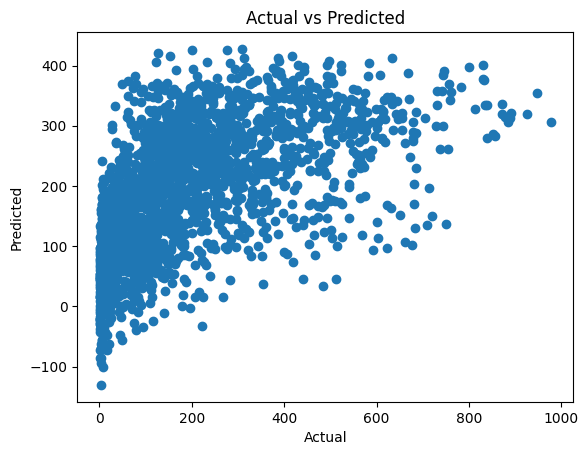

In [37]:
# 회귀모형의 실제 테스트 값과 예측값 사이의 관계를 알아보겠습니다.
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

In [38]:
# 모형의 적합도 및 성능을 알아보기 위해 R2, Adj-R2, MSE, RMSE, MAE, MAPE를 구합니다.
# R2와 Adj-R2은 0에서 1사이의 값을 갖는데, 1에 가까울수록 설명력이 높습니다.\
# MSE, RMSE, MAE, MAPE는 낮을수록 좋습니다.
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_absolute_percentage_error
from math import sqrt

mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
adj_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
mape = mean_absolute_percentage_error(y_test, y_pred)

print("r2: ", r2)
print("adj_r2: ", adj_r2)
print("mse: ", mse)
print("rmse: ", rmse)
print("mae: ", mae)
print("mape: ", mape)


r2:  0.3488811691622168
adj_r2:  0.3458764675893613
mse:  21491.437489980293
rmse:  146.59958216168386
mae:  107.58636237605774
mape:  3.1984441188562345


In [ ]:
# 모형의 적합도 및 성능을 알아보기 위해 R2, Adj-R2, MSE, RMSE, MAE, MAPE를 확인 결과,
# R2: 0.35, Adj-R2: 0.35, MSE: 21491.43, RMSE: 146.60, MAE: 107.59, MAPE: 3.2 입니다.

### 모형설명
- **결정 계수(R²):** 이 값은 모형이 데이터의 변동성을 얼마나 잘 설명하는지를 나타내는 지표입니다. 0.35의 R² 값은 모형이 데이터의 약 35%만 설명하고 있음을 의미하며, 이는 상대적으로 낮은 수치로, 모델이 데이터에 대해 상당 부분 설명하지 못하고 있다는 것을 나타냅니다.

- **평균 제곱 오차(MSE):** 이 값은 모델의 예측값과 실제값의 차이를 제곱한 후 평균을 낸 것입니다. MSE가 21491.43이라는 것은 예측 오류가 상당히 크다는 것을 의미합니다.